In [1]:
import imutils
from imutils import contours
import cv2
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
image =cv2.imread("creditcard2.jpg")
gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

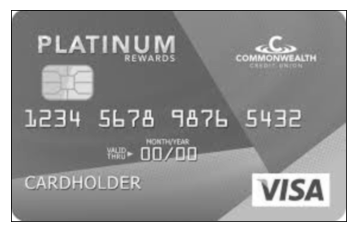

In [4]:
plt.imshow(gray,cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
rectKernel =cv2.getStructuringElement(cv2.MORPH_RECT, (9,3))
sqKernel =cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
tophat =cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

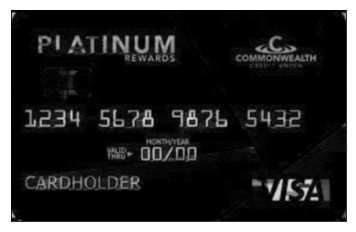

In [6]:
plt.imshow(tophat,cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
#compute gradient along x-direction
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0,ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

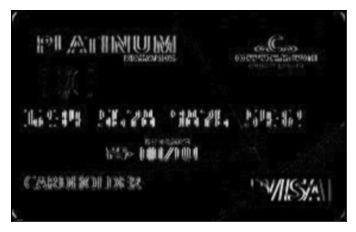

In [8]:
plt.imshow(gradX,cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
#perform morphological operations and thresholding to remove unwanted components
gradX =cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh =cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

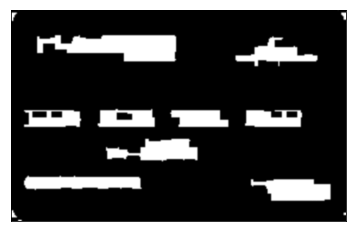

In [10]:
plt.imshow(thresh,cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [12]:
locs = []

In [13]:
# loop over the contours
for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    #filter out the components that don't belong to credit card digits
    if ar > 2.5 and ar < 4.0:
        if (w > 40 and w < 55) and (h > 10 and h < 20):
            locs.append((x, y, w, h))

In [14]:
# sort the digit locations from left-to-right
locs = sorted(locs, key=lambda x:x[0])

In [15]:
colorMap=[plt.cm.get_cmap('Greys',50), plt.cm.get_cmap('Reds',50),plt.cm.get_cmap('Greens',50),plt.cm.get_cmap('Blues',50)]

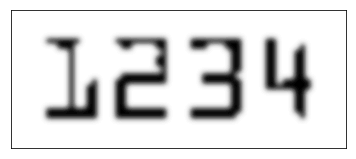

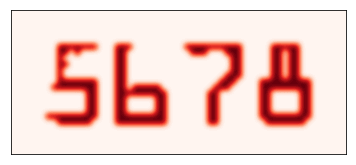

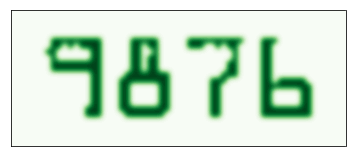

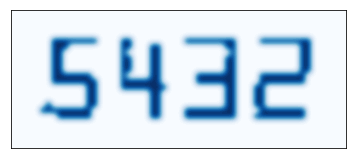

In [16]:
for (i, (gX, gY, gW, gH)) in enumerate(locs):

    # extract the group ROI of 4 digits 
    group = gray[gY - 5:gY + gH + 5, gX - 5:gX + gW + 5]
    group = cv2.threshold(group, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
    #find the contour of each digit in the group, then sort the digit contour from left to right
    digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    digitCnts = imutils.grab_contours(digitCnts)
    digitCnts = contours.sort_contours(digitCnts,method="left-to-right")[0]
    
    #display the credit card digits
    plt.imshow(group,cmap=colorMap[i], interpolation='bicubic')
    plt.xticks([])
    plt.yticks([])
    plt.show()